In [85]:
import yfinance as yf

In [86]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [87]:
stock = "GOOG"
google_data = yf.download(stock, start, end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [88]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-28,4.497262,4.581050,4.485611,4.503707,350830087
2005-03-29,4.451402,4.543370,4.414218,4.488090,259890496
2005-03-30,4.473216,4.498006,4.452145,4.477926,250378977
2005-03-31,4.474704,4.496519,4.403559,4.411244,271758815
2005-04-01,4.463053,4.535190,4.461814,4.505691,248206866


In [89]:
google_data.shape

(5033, 5)

In [90]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,50.534979,51.049204,50.006579,50.514640,1.038821e+08
std,48.353730,48.865604,47.841041,48.326849,1.343614e+08
min,4.451402,4.496519,4.403559,4.411244,1.584340e+05
25%,13.515086,13.663576,13.378748,13.527483,2.615800e+07
50%,28.653246,28.865652,28.433247,28.717761,4.834400e+07
75%,68.870796,69.451046,67.314664,68.527928,1.272151e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [91]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-03-28 to 2025-03-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


We can see that, the dataset contains all numeric values so no need to convert non-numeric to numeric.

In [92]:
google_data.isna()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-28,False,False,False,False,False
2005-03-29,False,False,False,False,False
2005-03-30,False,False,False,False,False
2005-03-31,False,False,False,False,False
2005-04-01,False,False,False,False,False
...,...,...,...,...,...
2025-03-20,False,False,False,False,False
2025-03-21,False,False,False,False,False


We dont find any null values here so, it is a clean dataset.

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [95]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

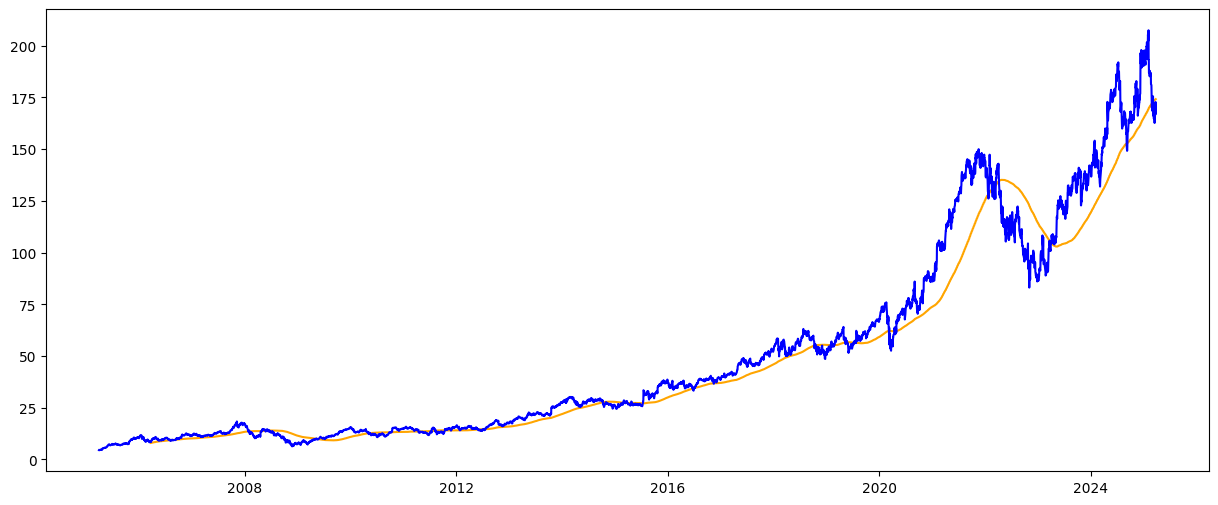

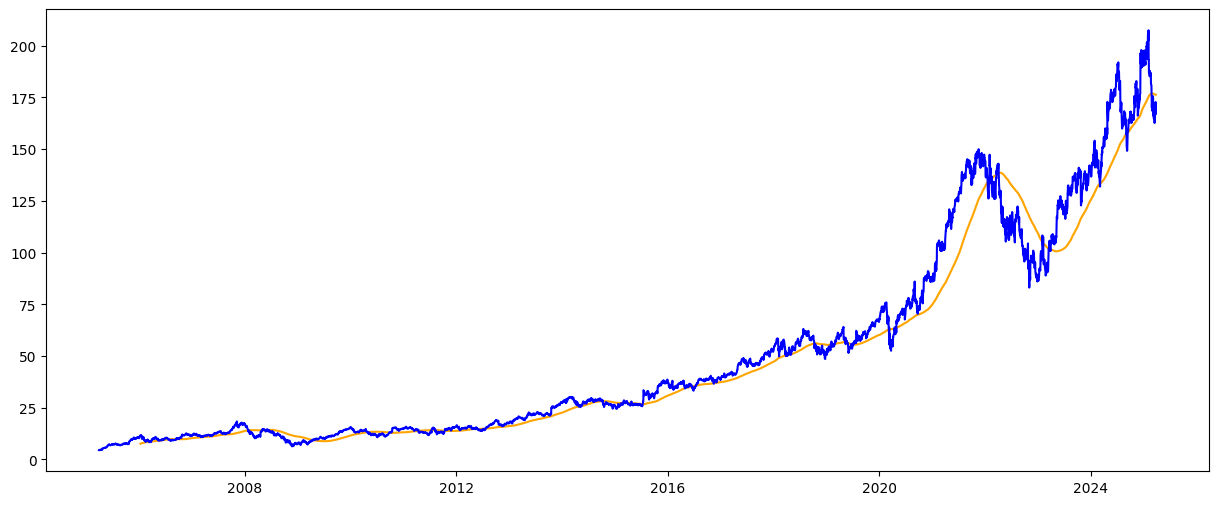

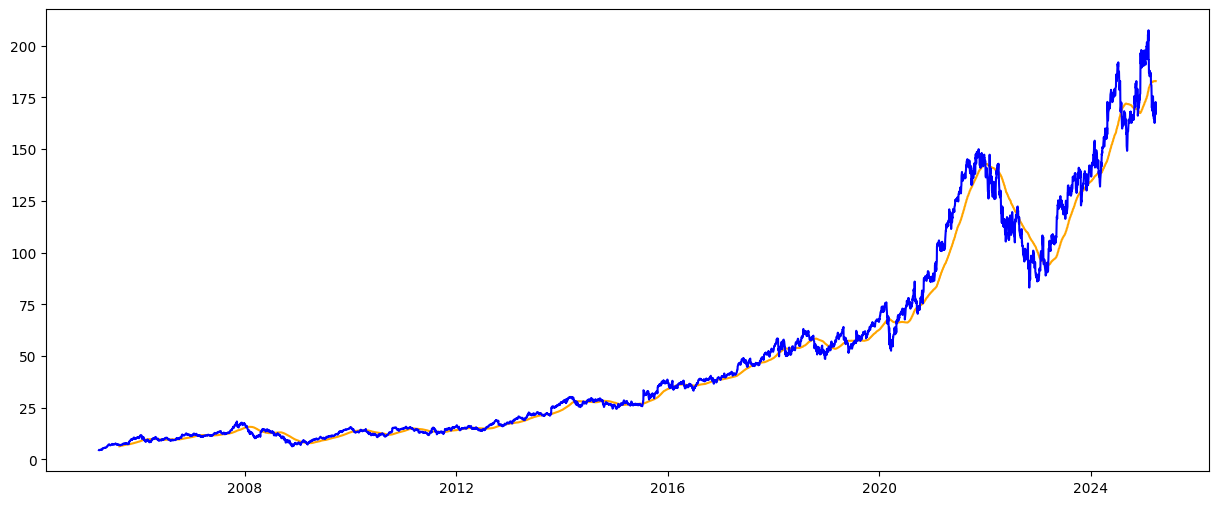

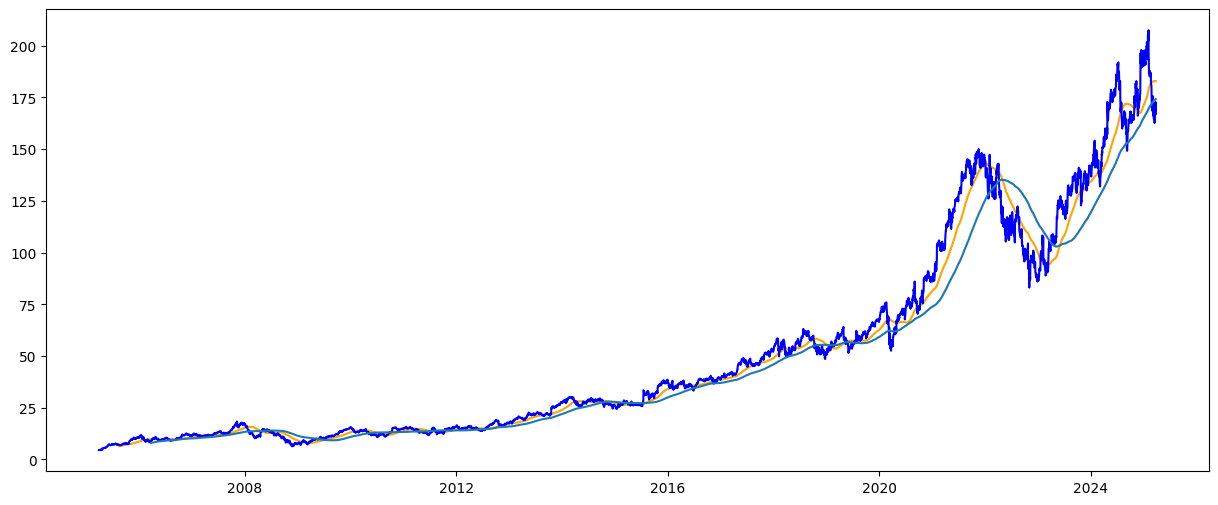

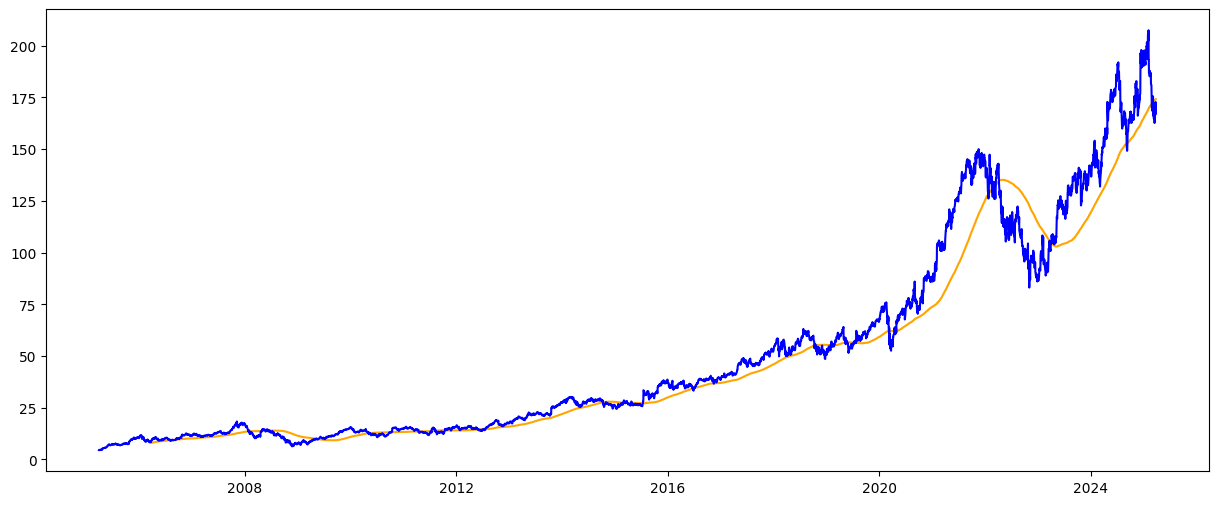

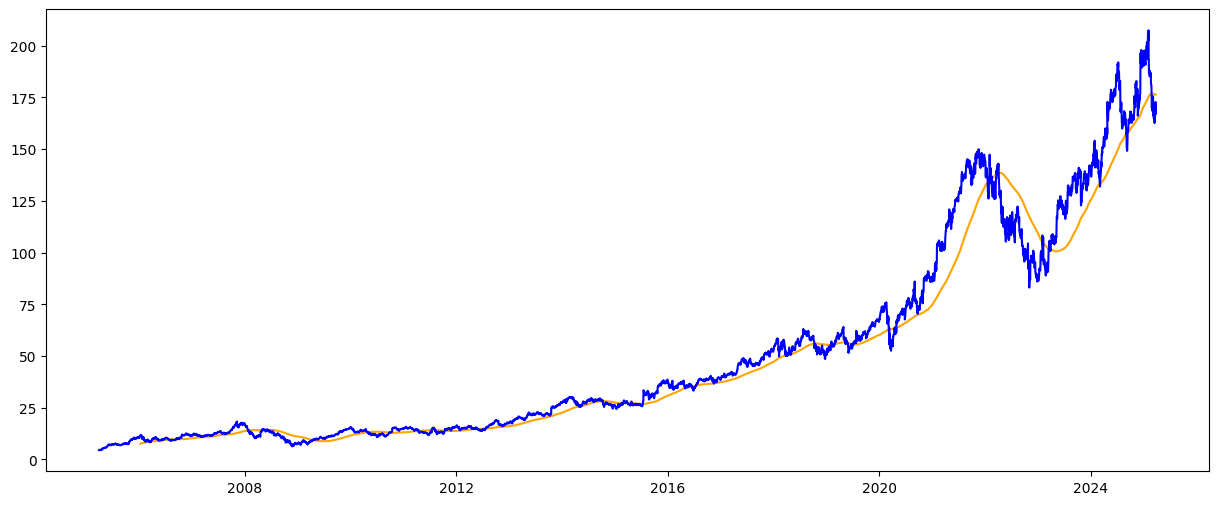

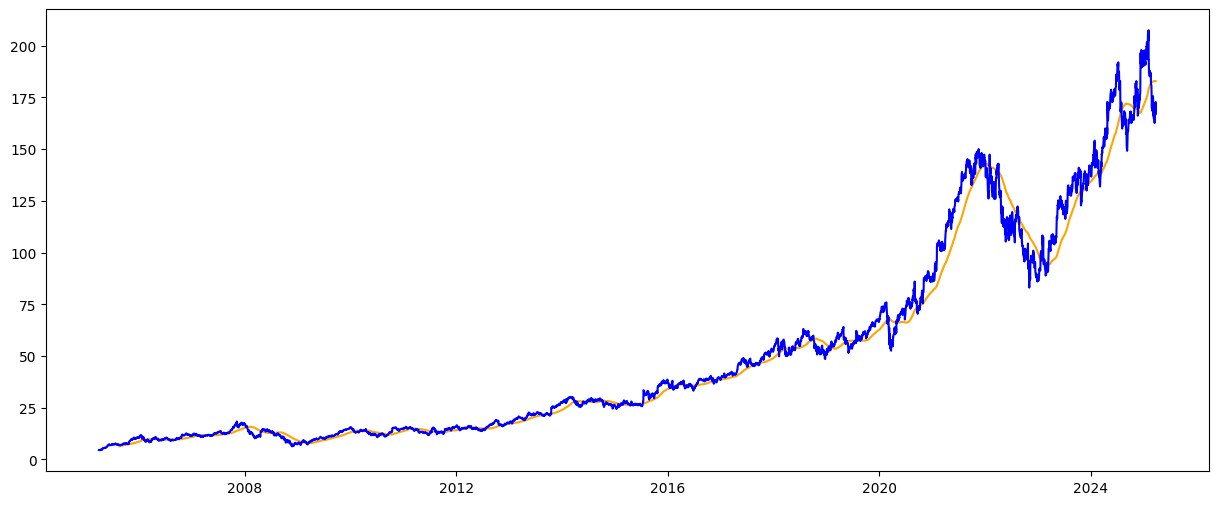

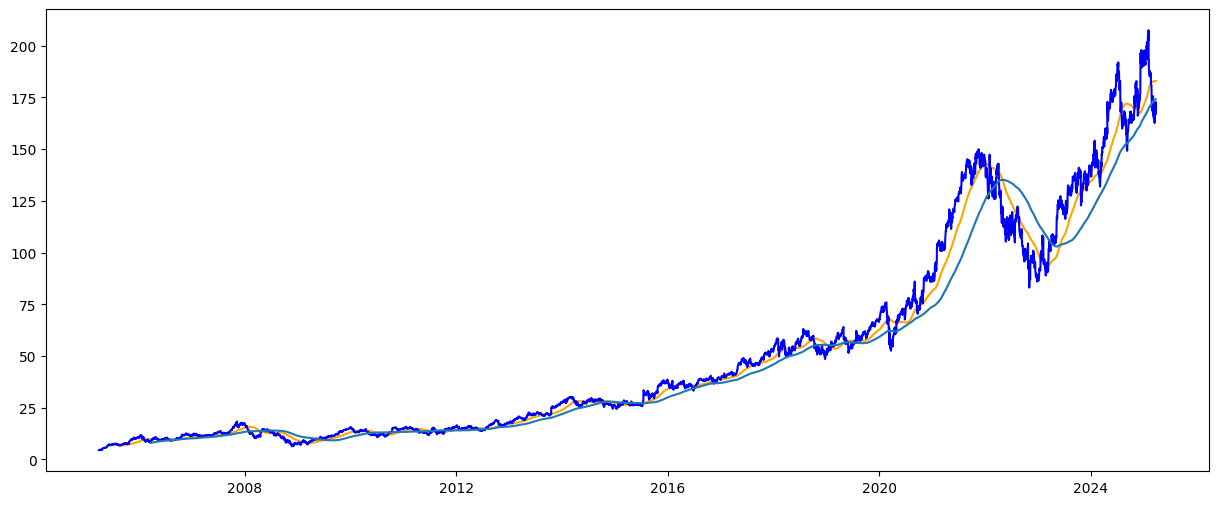

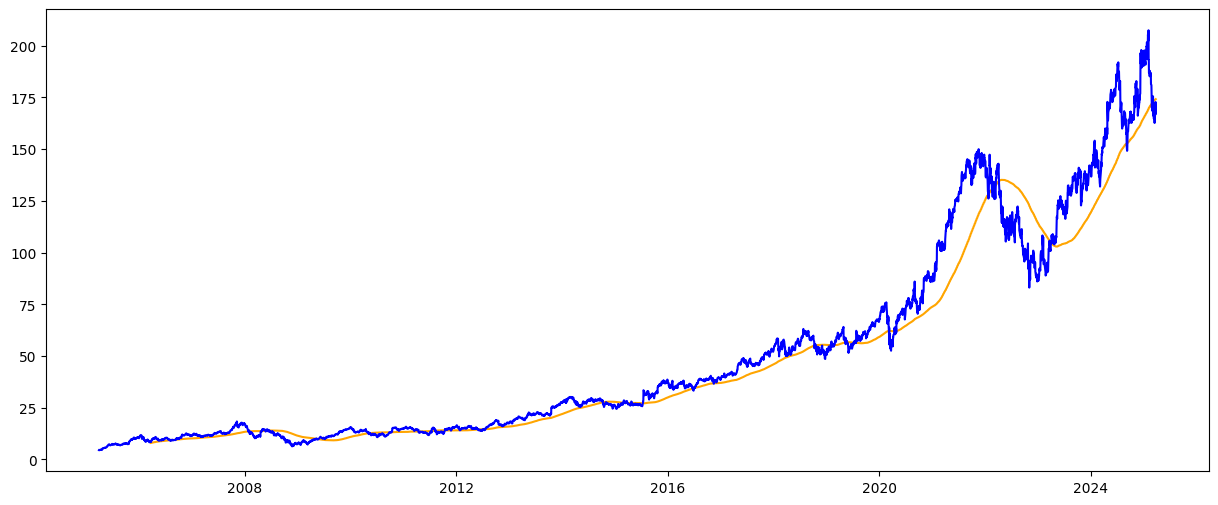

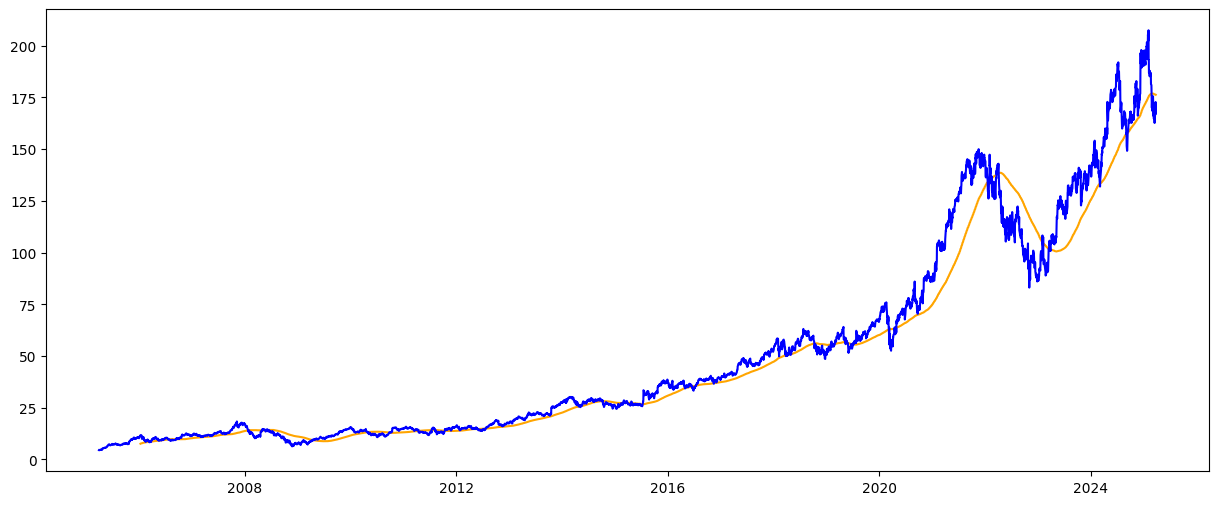

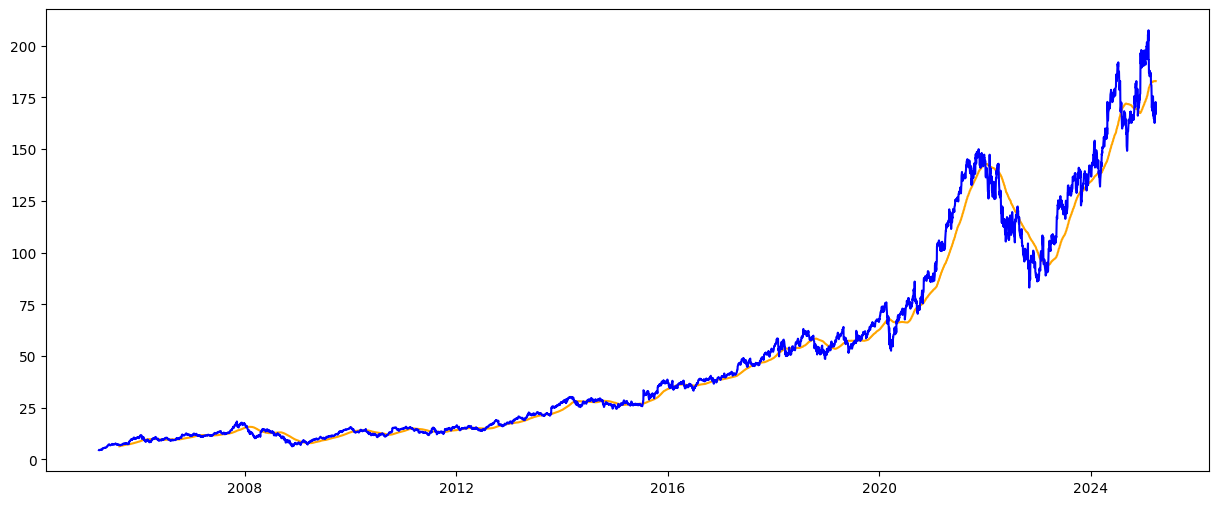

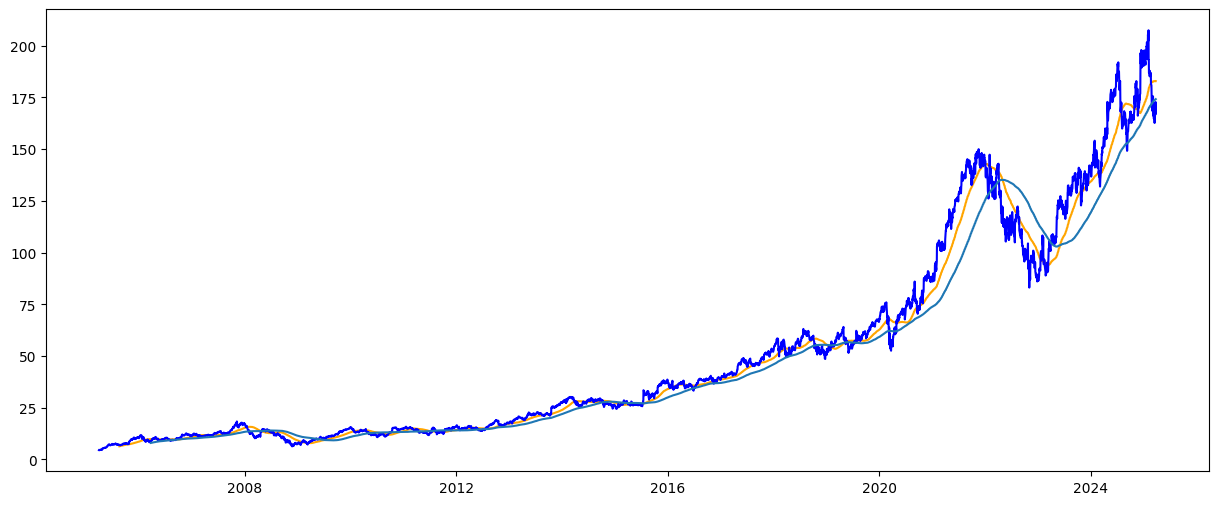

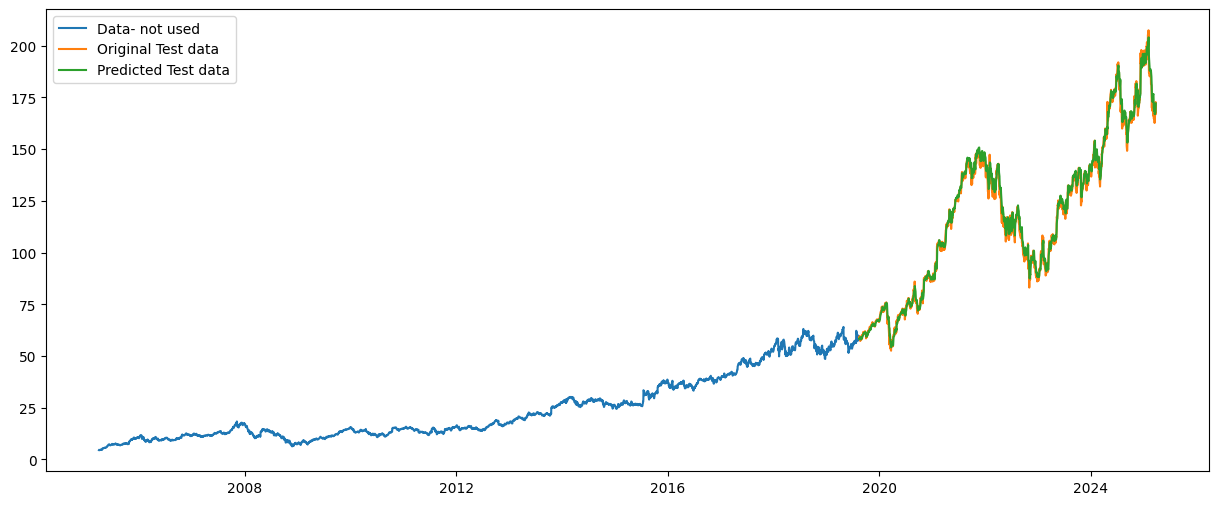

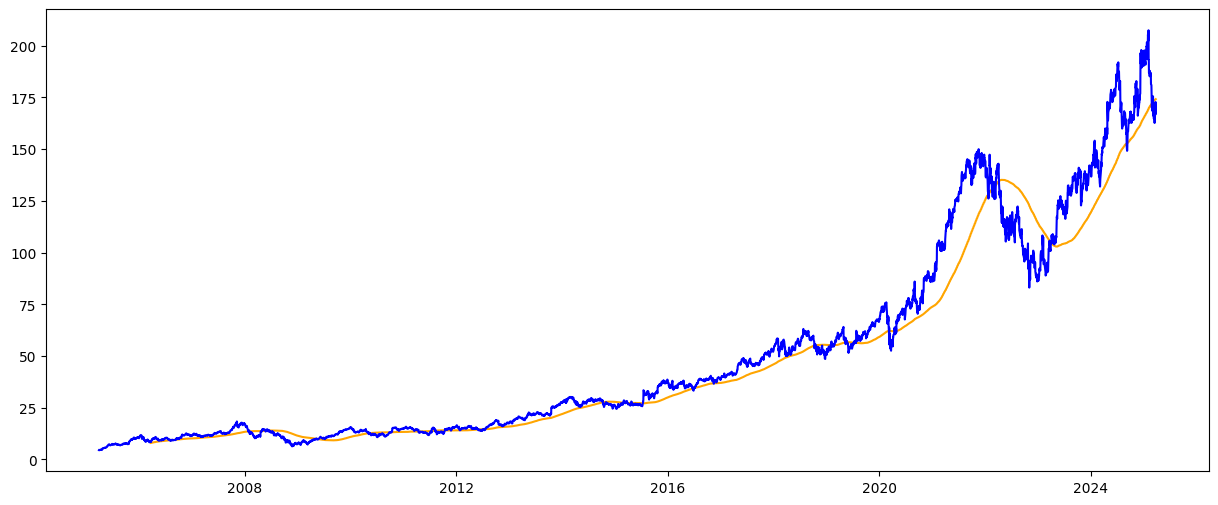

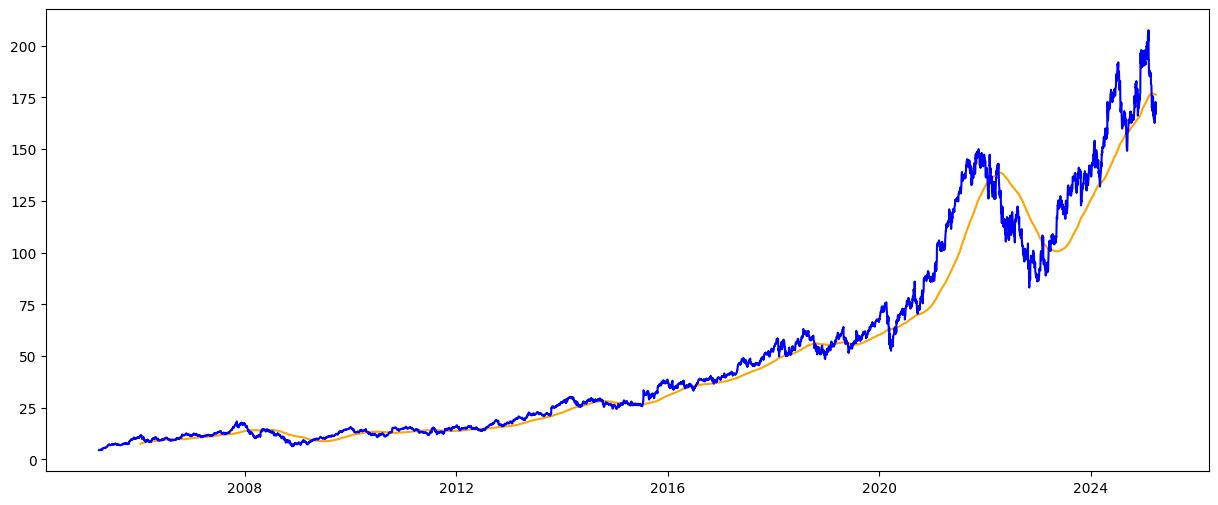

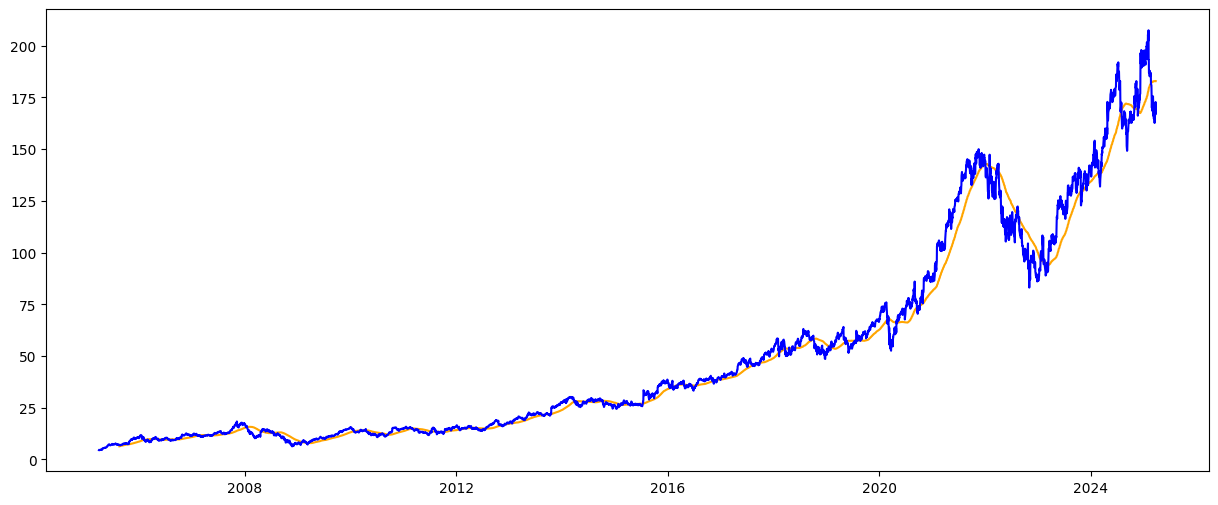

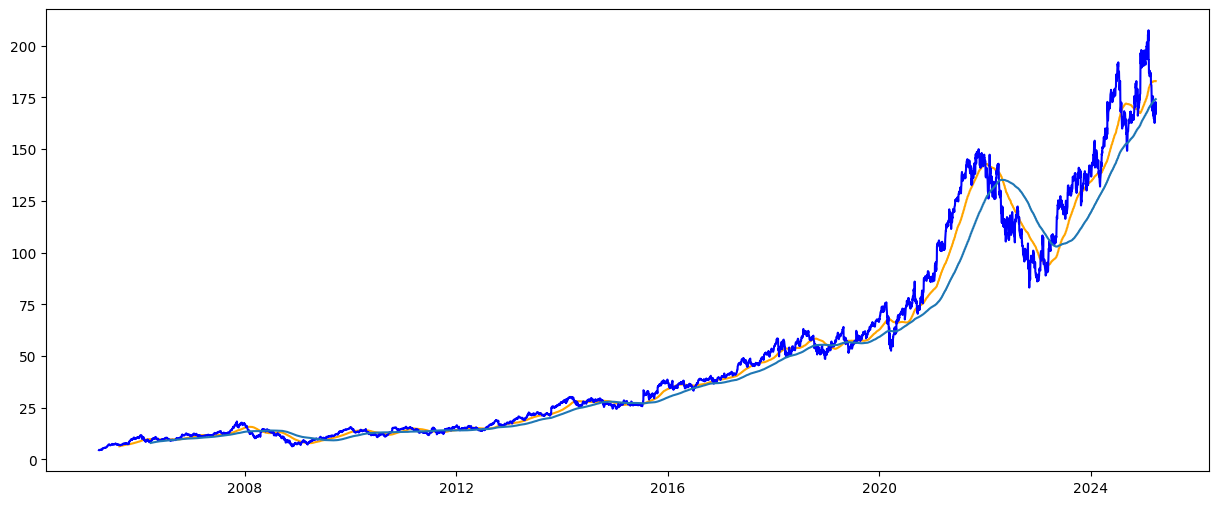

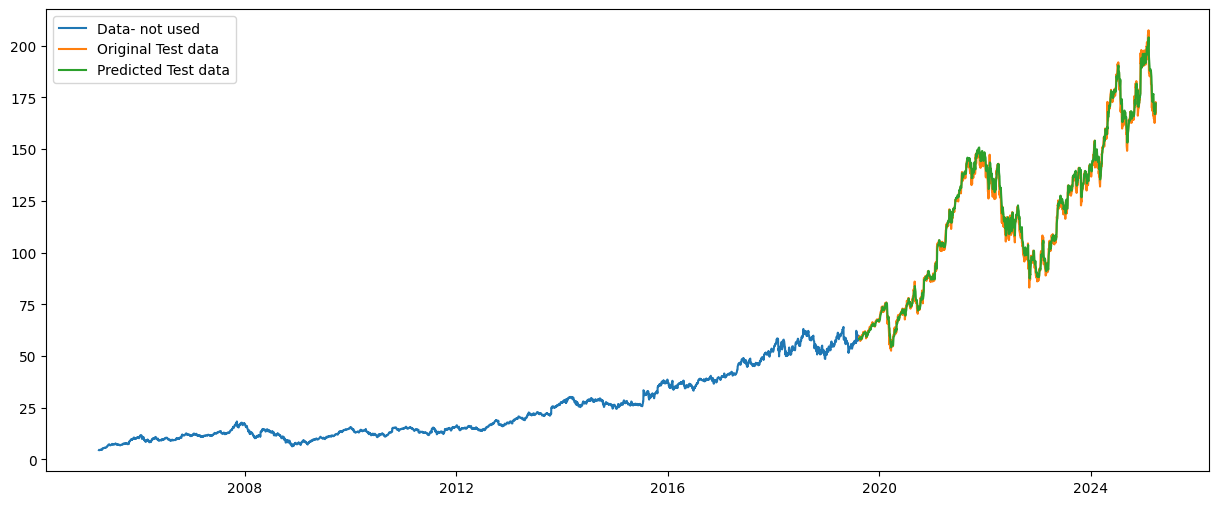

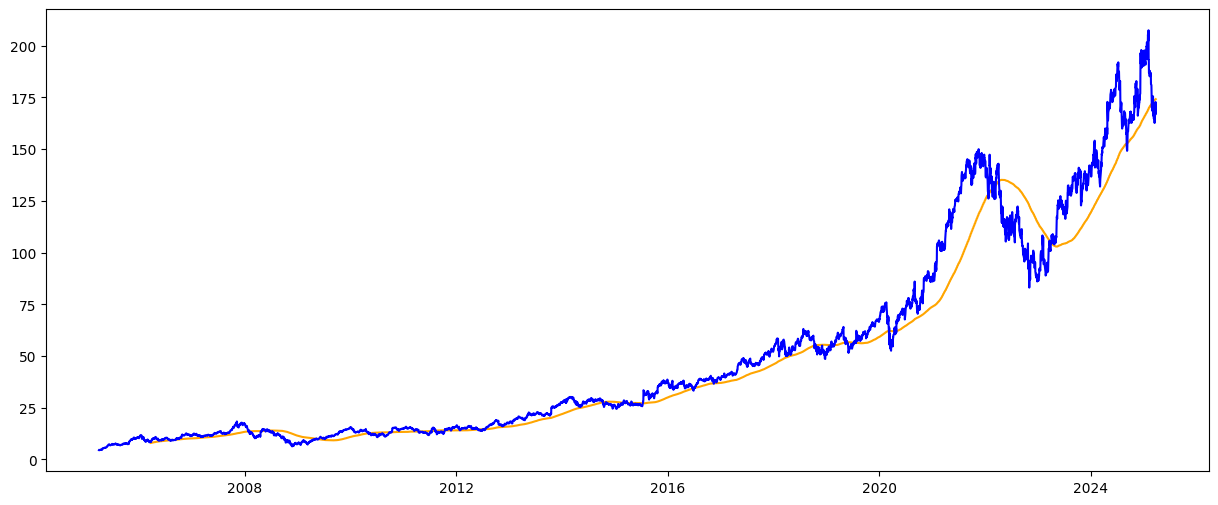

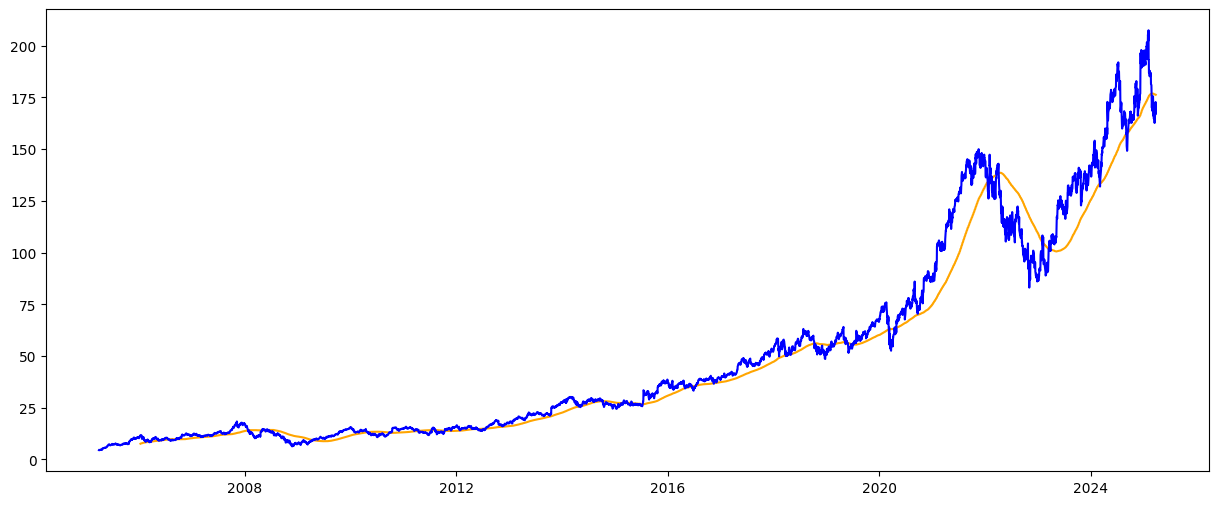

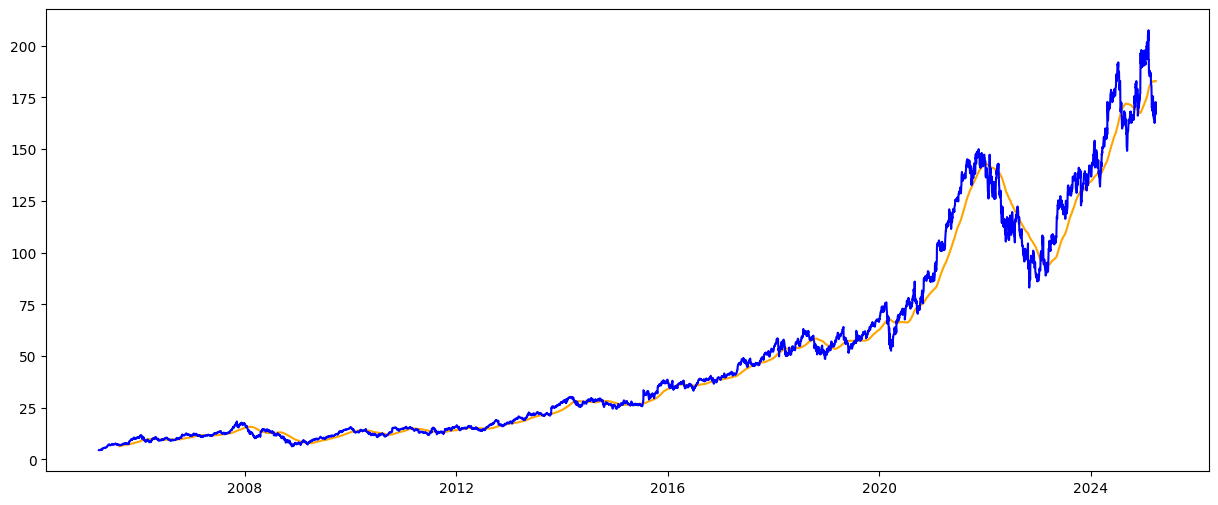

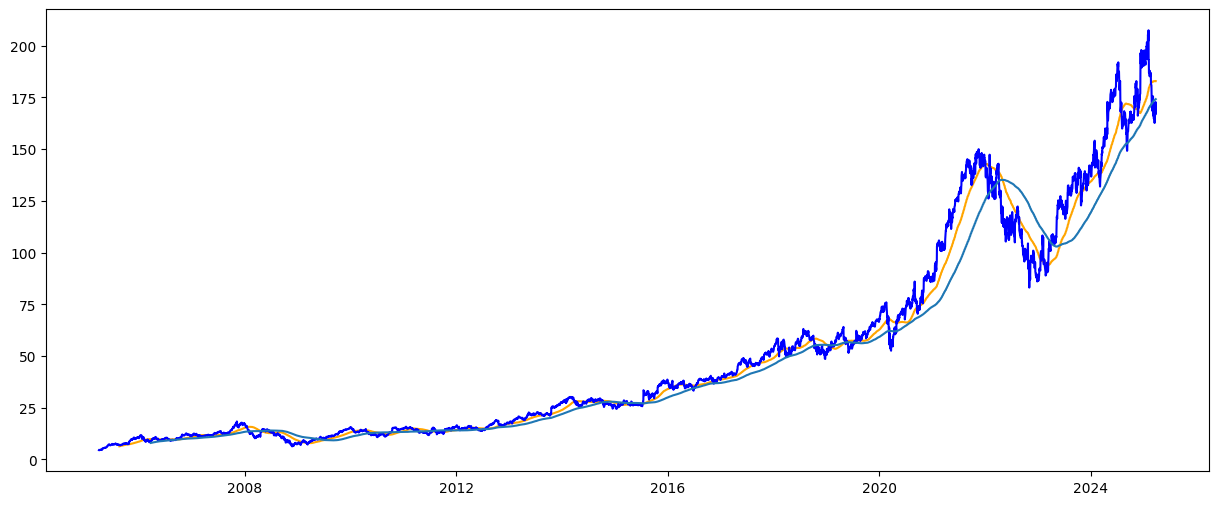

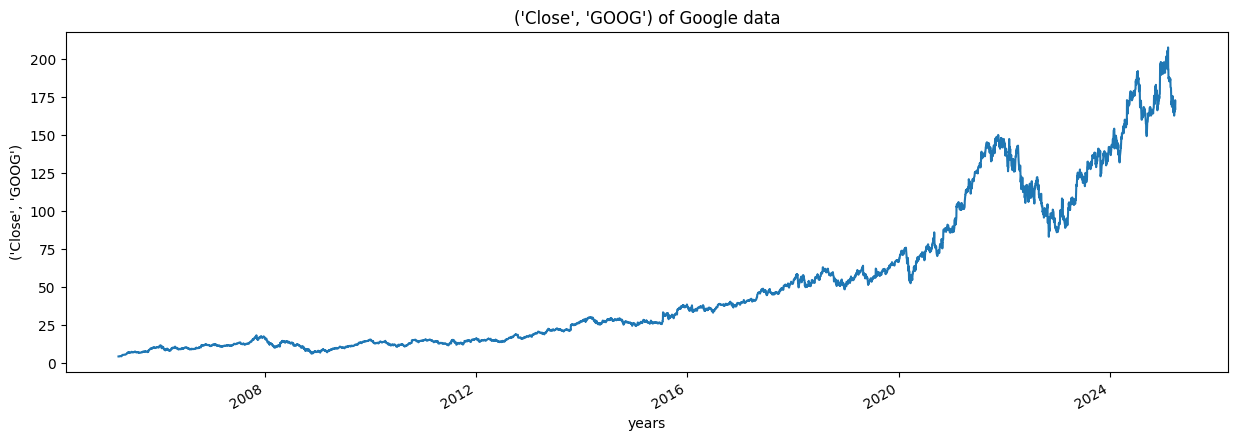

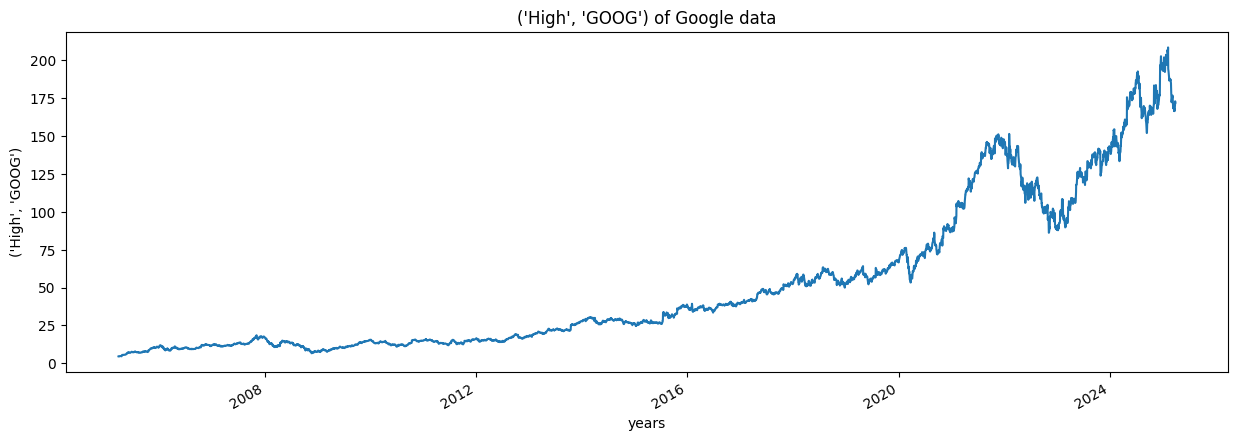

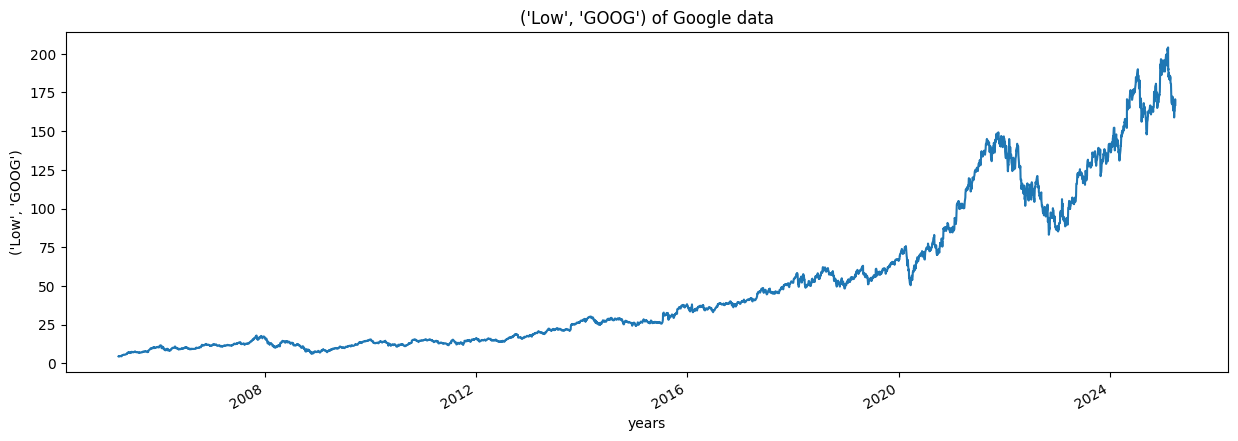

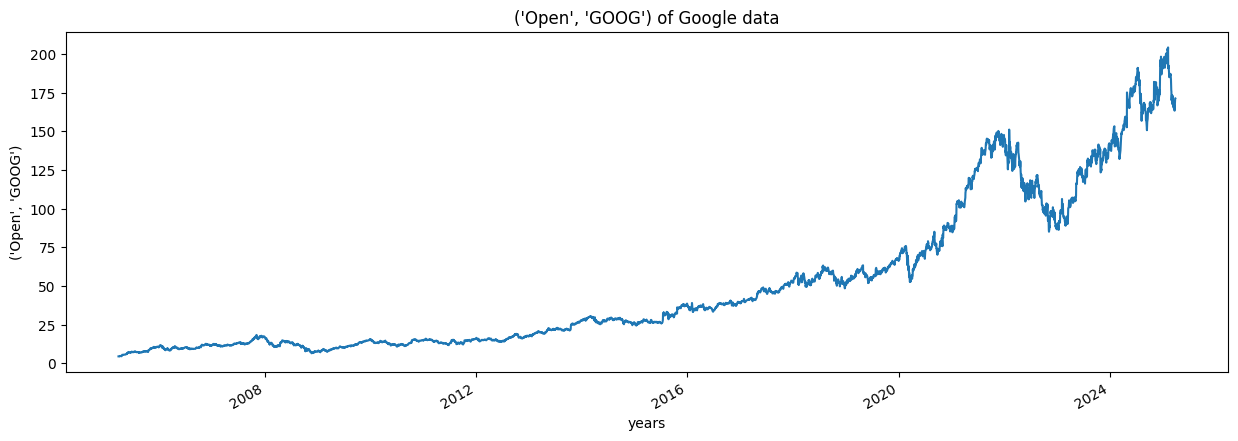

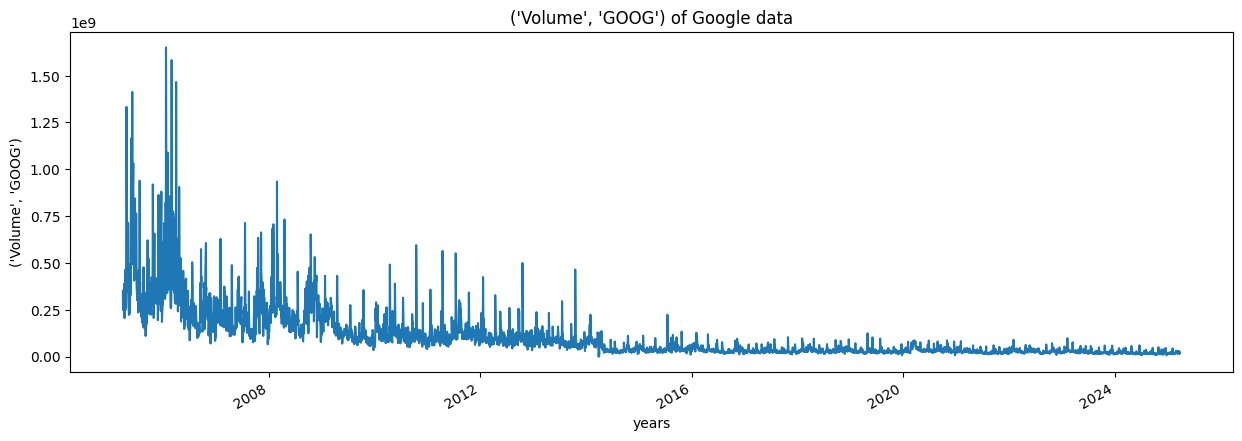

In [96]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [97]:
import pandas as pd
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [98]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-03-16,NaN
2006-03-17,NaN
2006-03-20,NaN
2006-03-21,NaN
2006-03-22,8.00591


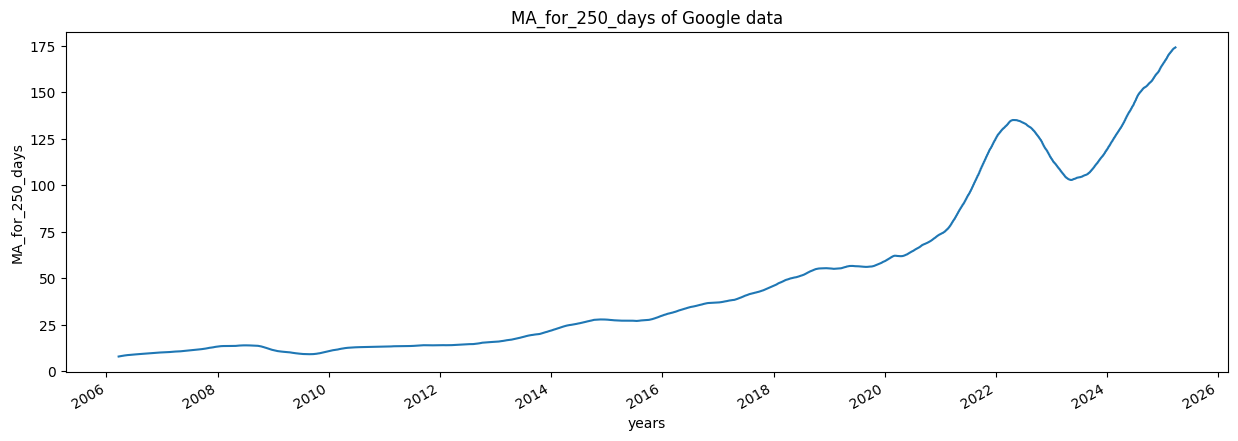

In [99]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

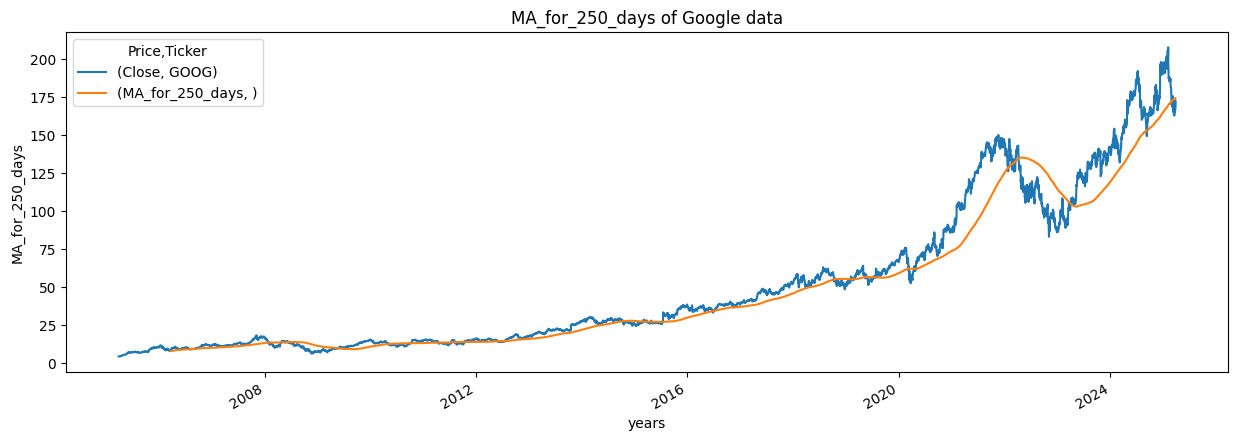

In [100]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

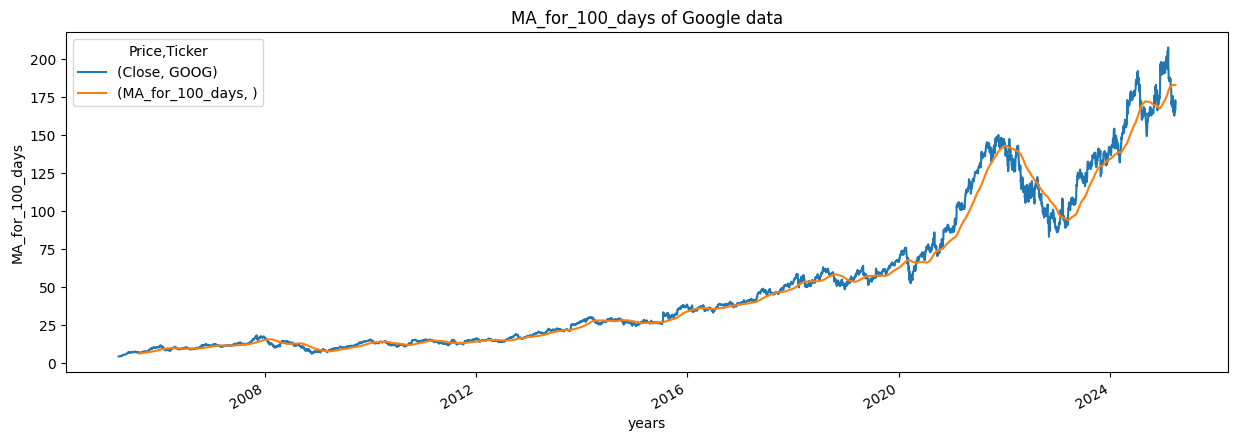

In [101]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

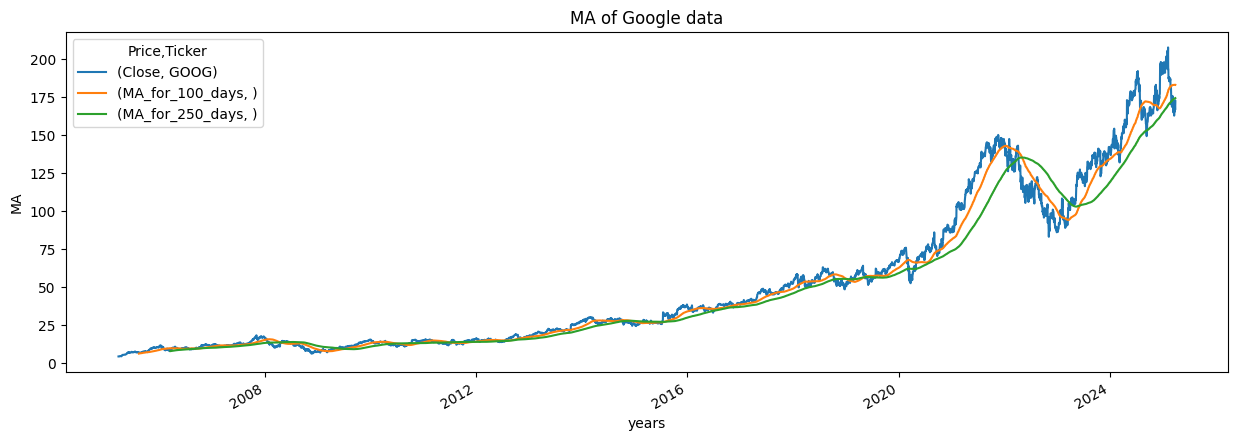

In [102]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [103]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-28,4.497262,NaN
2005-03-29,4.451402,-0.010197
2005-03-30,4.473216,0.004900
2005-03-31,4.474704,0.000333
2005-04-01,4.463053,-0.002604


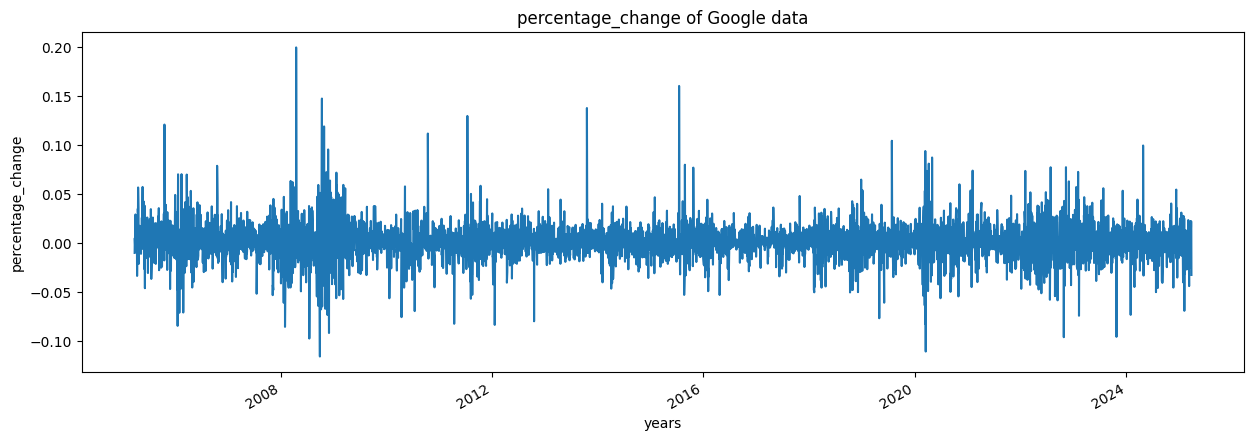

In [104]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')


In [106]:
Close_price = google_data[['Close']]

In [107]:
max(Close_price.values),min(Close_price.values)

(array([207.47363281]), array([4.45140219]))

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[2.25883327e-04],
       [0.00000000e+00],
       [1.07445719e-04],
       ...,
       [8.15076211e-01],
       [8.29163341e-01],
       [8.01333907e-01]])

In [109]:
len(scaled_data)

5033

In [110]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [111]:
x_data[0],y_data[0]

(array([[2.25883327e-04],
        [0.00000000e+00],
        [1.07445719e-04],
        [1.14773645e-04],
        [5.73879968e-05],
        [6.98417135e-04],
        [1.09890944e-03],
        [1.17827182e-03],
        [1.73261066e-03],
        [1.52382113e-03],
        [1.66790178e-03],
        [1.75703473e-03],
        [1.63127154e-03],
        [1.45056065e-03],
        [6.63008220e-04],
        [9.03547399e-04],
        [1.44445640e-03],
        [2.26253246e-03],
        [3.00979069e-03],
        [4.42494478e-03],
        [5.36756271e-03],
        [4.78391687e-03],
        [4.90968006e-03],
        [4.86939055e-03],
        [4.93654677e-03],
        [5.21615883e-03],
        [5.69235425e-03],
        [5.97440190e-03],
        [5.78881043e-03],
        [5.91579728e-03],
        [5.67159414e-03],
        [5.88893292e-03],
        [6.31506827e-03],
        [6.00126862e-03],
        [6.06476087e-03],
        [6.28576126e-03],
        [6.53973497e-03],
        [7.27600367e-03],
        [7.2

In [112]:
int(len(x_data)*0.7)

3453

In [113]:
5032-100-int(len(x_data)*0.7)

1479

In [115]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [116]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [117]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [65]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 281s 81ms/step - loss: 3.4850e-05
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 314s 78ms/step - loss: 3.1095e-05


In [119]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


In [121]:
predictions

array([[0.27625865],
       [0.27358383],
       [0.27242264],
       ...,
       [0.8050467 ],
       [0.8232107 ],
       [0.83509934]], dtype=float32)

In [122]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 60.538048],
       [ 59.995003],
       [ 59.759254],
       ...,
       [167.89377 ],
       [171.58148 ],
       [173.99513 ]], dtype=float32)

In [123]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.03860092],
       [ 57.84502029],
       [ 57.93907547],
       ...,
       [169.92999268],
       [172.78999329],
       [167.13999939]])

In [125]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

np.float64(3.2797765317818093)

In [126]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-08,58.038601,60.538048
2019-05-09,57.845020,59.995003
2019-05-10,57.939075,59.759254
2019-05-13,56.334675,59.858875
2019-05-14,55.757904,58.192909


<Figure size 640x480 with 0 Axes>

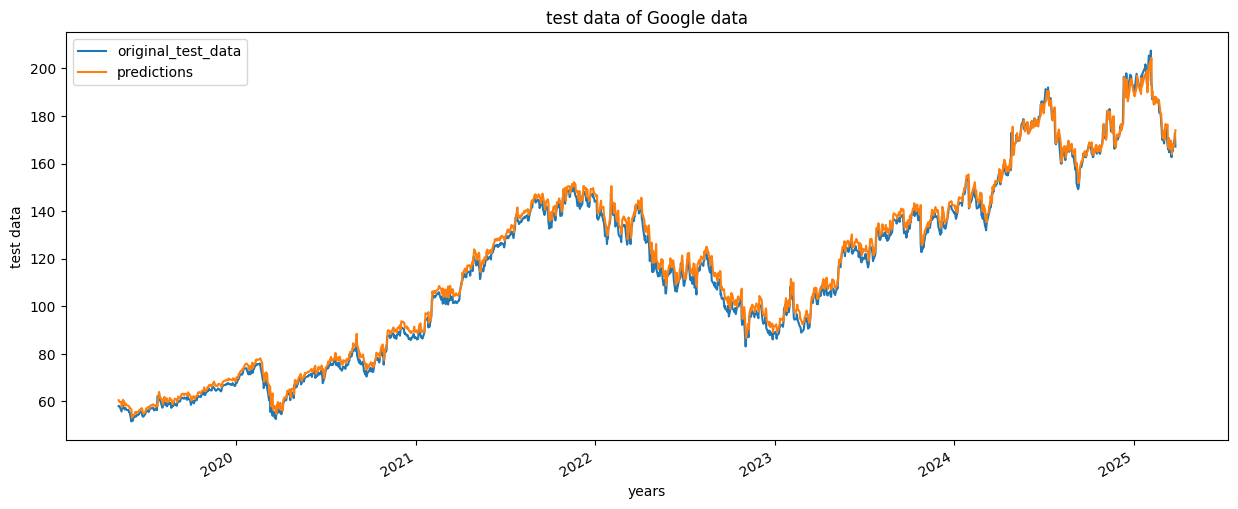

In [127]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

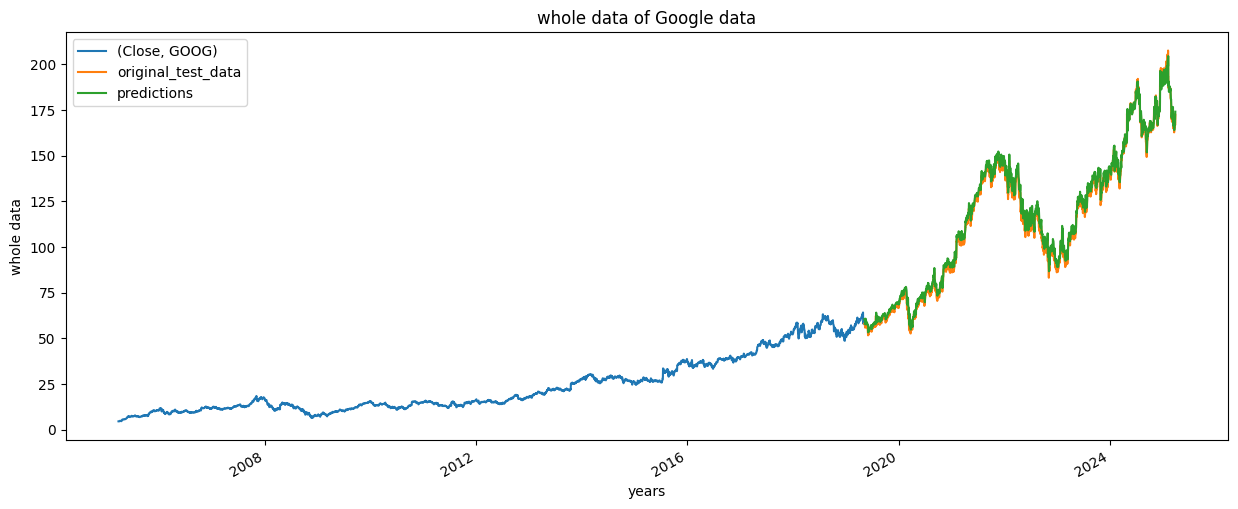

In [130]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [131]:
model.save("Latest_stock_price_model.keras")